In [1]:
import pandas as pd
import numpy as np
import gc; gc.enable()
import lightgbm as lgb

from GridSearcher import data_loader, model_loader, fit_params, get_oof_predictions

In [2]:
DATA_TYPE = 'tf-idf'
DATA_NORMALIZE = True
IS_REGRESSION = True
SEED = 411

In [3]:
dl = data_loader(data_type=DATA_TYPE, is_regression=IS_REGRESSION, is_train=True)
train_X, train_y = dl.load()

Arguments: tf-idf True True
target loaded
title text features loaded
param text features loaded
desc text features loaded


In [4]:
dl_test = data_loader(data_type=DATA_TYPE, is_regression=IS_REGRESSION, is_train=False)
test_X = dl_test.load()

Arguments: tf-idf True False
target loaded
title text features loaded
param text features loaded
desc text features loaded


In [5]:
train_X.shape, train_y.shape, test_X.shape

((1503424, 37837), (1503424,), (508438, 37837))

## LGBM

In [6]:
ml = model_loader(model_type='lgb')

In [7]:
default_params = {
    'boosting_type':'gbdt', 
    'num_leaves':31, 
    'max_depth':5, 
    'learning_rate':0.1, 
    'n_estimators':100, 
    'min_split_gain':0.0, 
    'min_child_weight':0.001, 
    'min_child_samples':20, 
    'subsample':0.8, 
    'subsample_freq':1, 
    'colsample_bytree':0.8, 
    'reg_alpha':0.0, 
    'reg_lambda':0.0, 
    'random_state':SEED, 
    'n_job': 4
}

try_params = {
    'boosting_type': ['gbdt', 'dart']
}

fit_params(train_X, train_y, ml, default_params, try_params, fit_params=None, seed=SEED)

{'boosting_type': 'gbdt'} train loss: 0.232609, valid loss:0.233984, loss_diff:0.001376
{'boosting_type': 'gbdt'} train loss: 0.232771, valid loss:0.233534, loss_diff:0.000763
{'boosting_type': 'gbdt'} train loss: 0.232824, valid loss:0.233249, loss_diff:0.000425
{'boosting_type': 'gbdt'} train loss: 0.232670, valid loss:0.233698, loss_diff:0.001028
{'boosting_type': 'gbdt'} train loss: 0.233115, valid loss:0.232592, loss_diff:-0.000523
=================>{'boosting_type': 'gbdt'} loss:0.233412
{'boosting_type': 'dart'} train loss: 0.238317, valid loss:0.239322, loss_diff:0.001004
{'boosting_type': 'dart'} train loss: 0.238442, valid loss:0.238732, loss_diff:0.000289
{'boosting_type': 'dart'} train loss: 0.238284, valid loss:0.238236, loss_diff:-0.000048
{'boosting_type': 'dart'} train loss: 0.238170, valid loss:0.238856, loss_diff:0.000686
{'boosting_type': 'dart'} train loss: 0.238621, valid loss:0.237746, loss_diff:-0.000874
=================>{'boosting_type': 'dart'} loss:0.238578
B

,param,val_loss_mean,val_loss_std
0,{'boosting_type': 'gbdt'},0.233412,0.000474
1,{'boosting_type': 'dart'},0.238578,0.000541


In [8]:
default_params = {
    'boosting_type':'gbdt', 
    'num_leaves':31, 
    'max_depth':5, 
    'learning_rate':0.1, 
    'n_estimators':100, 
    'min_split_gain':0.0, 
    'min_child_weight':0.001, 
    'min_child_samples':20, 
    'subsample':0.8, 
    'subsample_freq':1, 
    'colsample_bytree':0.8, 
    'reg_alpha':0.0, 
    'reg_lambda':0.0, 
    'random_state':SEED, 
    'n_job': 4
}

try_params = {
    'min_split_gain': [i/10.0 for i in range(0,5)]
}

fit_params(train_X, train_y, ml, default_params, try_params, fit_params=None, seed=SEED)

{'min_split_gain': 0.0} train loss: 0.232609, valid loss:0.233984, loss_diff:0.001376
{'min_split_gain': 0.0} train loss: 0.232771, valid loss:0.233534, loss_diff:0.000763
{'min_split_gain': 0.0} train loss: 0.232824, valid loss:0.233249, loss_diff:0.000425
{'min_split_gain': 0.0} train loss: 0.232670, valid loss:0.233698, loss_diff:0.001028
{'min_split_gain': 0.0} train loss: 0.233115, valid loss:0.232592, loss_diff:-0.000523
=================>{'min_split_gain': 0.0} loss:0.233412
{'min_split_gain': 0.1} train loss: 0.232627, valid loss:0.233982, loss_diff:0.001355
{'min_split_gain': 0.1} train loss: 0.232773, valid loss:0.233517, loss_diff:0.000744
{'min_split_gain': 0.1} train loss: 0.232802, valid loss:0.233228, loss_diff:0.000426
{'min_split_gain': 0.1} train loss: 0.232731, valid loss:0.233755, loss_diff:0.001024
{'min_split_gain': 0.1} train loss: 0.233088, valid loss:0.232557, loss_diff:-0.000531
=================>{'min_split_gain': 0.1} loss:0.233408
{'min_split_gain': 0.2} tr

,param,val_loss_mean,val_loss_std
0,{'min_split_gain': 0.0},0.233412,0.000474
1,{'min_split_gain': 0.1},0.233408,0.000494
2,{'min_split_gain': 0.2},0.233386,0.000494
3,{'min_split_gain': 0.3},0.233419,0.000492
4,{'min_split_gain': 0.4},0.233425,0.000471


In [13]:
default_params = {
    'boosting_type':'gbdt', 
    'num_leaves':31, 
    'max_depth':5, 
    'learning_rate':0.1, 
    'n_estimators':100, 
    'min_split_gain':0.0, 
    'min_child_weight':0.001, 
    'min_child_samples':20, 
    'subsample':0.8, 
    'subsample_freq':1, 
    'colsample_bytree':0.8, 
    'reg_alpha':0.0, 
    'reg_lambda':0.0, 
    'random_state':SEED, 
    'n_job': 4
}

try_params = {
    'colsample_bytree':[i/10.0 for i in range(6,11)]
}

fit_params(train_X, train_y, ml, default_params, try_params, fit_params=None, seed=SEED)

{'colsample_bytree': 0.6} train loss: 0.232617, valid loss:0.233968, loss_diff:0.001351
{'colsample_bytree': 0.6} train loss: 0.232823, valid loss:0.233523, loss_diff:0.000700
{'colsample_bytree': 0.6} train loss: 0.232878, valid loss:0.233326, loss_diff:0.000448
{'colsample_bytree': 0.6} train loss: 0.232768, valid loss:0.233797, loss_diff:0.001029
{'colsample_bytree': 0.6} train loss: 0.233143, valid loss:0.232588, loss_diff:-0.000554
=================>{'colsample_bytree': 0.6} loss:0.233441
{'colsample_bytree': 0.7} train loss: 0.232718, valid loss:0.234049, loss_diff:0.001330
{'colsample_bytree': 0.7} train loss: 0.232825, valid loss:0.233573, loss_diff:0.000748
{'colsample_bytree': 0.7} train loss: 0.232863, valid loss:0.233269, loss_diff:0.000406
{'colsample_bytree': 0.7} train loss: 0.232636, valid loss:0.233686, loss_diff:0.001050
{'colsample_bytree': 0.7} train loss: 0.233089, valid loss:0.232500, loss_diff:-0.000590
=================>{'colsample_bytree': 0.7} loss:0.233415
{'

,param,val_loss_mean,val_loss_std
0,{'colsample_bytree': 0.6},0.233441,0.000480
1,{'colsample_bytree': 0.7},0.233415,0.000521
2,{'colsample_bytree': 0.8},0.233412,0.000474
3,{'colsample_bytree': 0.9},0.233404,0.000487
4,{'colsample_bytree': 1.0},0.233418,0.000526


In [14]:
default_params = {
    'boosting_type':'gbdt', 
    'num_leaves':31, 
    'max_depth':5, 
    'learning_rate':0.1, 
    'n_estimators':100, 
    'min_split_gain':0.0, 
    'min_child_weight':0.001, 
    'min_child_samples':20, 
    'subsample':0.8, 
    'subsample_freq':1, 
    'colsample_bytree':0.9, 
    'reg_alpha':0.0, 
    'reg_lambda':0.0, 
    'random_state':SEED, 
    'n_job': 4
}

try_params = {
    'subsample':[i/10.0 for i in range(6,11)]
}

fit_params(train_X, train_y, ml, default_params, try_params, fit_params=None, seed=SEED)

{'subsample': 0.6} train loss: 0.232576, valid loss:0.233920, loss_diff:0.001344
{'subsample': 0.6} train loss: 0.232765, valid loss:0.233531, loss_diff:0.000766
{'subsample': 0.6} train loss: 0.232867, valid loss:0.233282, loss_diff:0.000414
{'subsample': 0.6} train loss: 0.232661, valid loss:0.233682, loss_diff:0.001021
{'subsample': 0.6} train loss: 0.233087, valid loss:0.232536, loss_diff:-0.000550
=================>{'subsample': 0.6} loss:0.233390
{'subsample': 0.7} train loss: 0.232641, valid loss:0.234012, loss_diff:0.001372
{'subsample': 0.7} train loss: 0.232729, valid loss:0.233448, loss_diff:0.000719
{'subsample': 0.7} train loss: 0.232855, valid loss:0.233267, loss_diff:0.000412
{'subsample': 0.7} train loss: 0.232697, valid loss:0.233721, loss_diff:0.001024
{'subsample': 0.7} train loss: 0.233115, valid loss:0.232576, loss_diff:-0.000539
=================>{'subsample': 0.7} loss:0.233405
{'subsample': 0.8} train loss: 0.232608, valid loss:0.234000, loss_diff:0.001392
{'sub

,param,val_loss_mean,val_loss_std
0,{'subsample': 0.6},0.233390,0.000475
1,{'subsample': 0.7},0.233405,0.000485
2,{'subsample': 0.8},0.233404,0.000487
3,{'subsample': 0.9},0.233385,0.000500
4,{'subsample': 1.0},0.233397,0.000536


In [15]:
default_params = {
    'boosting_type':'gbdt', 
    'num_leaves':31, 
    'max_depth':5, 
    'learning_rate':0.1, 
    'n_estimators':100, 
    'min_split_gain':0.0, 
    'min_child_weight':0.001, 
    'min_child_samples':20, 
    'subsample':0.9, 
    'subsample_freq':1, 
    'colsample_bytree':0.9, 
    'reg_alpha':0.0, 
    'reg_lambda':0.0, 
    'random_state':SEED, 
    'n_job': 4
}

try_params = {
    'colsample_bytree': [0.85, 0.9, 0.95],
    'subsample':[0.85, 0.9, 0.95]
}

fit_params(train_X, train_y, ml, default_params, try_params, fit_params=None, seed=SEED)

{'colsample_bytree': 0.85, 'subsample': 0.85} train loss: 0.232724, valid loss:0.234086, loss_diff:0.001362
{'colsample_bytree': 0.85, 'subsample': 0.85} train loss: 0.232770, valid loss:0.233531, loss_diff:0.000760
{'colsample_bytree': 0.85, 'subsample': 0.85} train loss: 0.232832, valid loss:0.233263, loss_diff:0.000431
{'colsample_bytree': 0.85, 'subsample': 0.85} train loss: 0.232726, valid loss:0.233764, loss_diff:0.001038
{'colsample_bytree': 0.85, 'subsample': 0.85} train loss: 0.233084, valid loss:0.232544, loss_diff:-0.000540
=================>{'colsample_bytree': 0.85, 'subsample': 0.85} loss:0.233438
{'colsample_bytree': 0.85, 'subsample': 0.9} train loss: 0.232591, valid loss:0.233973, loss_diff:0.001382
{'colsample_bytree': 0.85, 'subsample': 0.9} train loss: 0.232710, valid loss:0.233476, loss_diff:0.000766
{'colsample_bytree': 0.85, 'subsample': 0.9} train loss: 0.232801, valid loss:0.233242, loss_diff:0.000441
{'colsample_bytree': 0.85, 'subsample': 0.9} train loss: 0.2

,param,val_loss_mean,val_loss_std
0,"{'colsample_bytree': 0.85, 'subsample': 0.85}",0.233438,0.000523
1,"{'colsample_bytree': 0.85, 'subsample': 0.9}",0.233390,0.000465
2,"{'colsample_bytree': 0.85, 'subsample': 0.95}",0.233391,0.000513
3,"{'colsample_bytree': 0.9, 'subsample': 0.85}",0.233414,0.000521
4,"{'colsample_bytree': 0.9, 'subsample': 0.9}",0.233385,0.000500
5,"{'colsample_bytree': 0.9, 'subsample': 0.95}",0.233401,0.000518
6,"{'colsample_bytree': 0.95, 'subsample': 0.85}",0.233424,0.000518
7,"{'colsample_bytree': 0.95, 'subsample': 0.9}",0.233427,0.000480
8,"{'colsample_bytree': 0.95, 'subsample': 0.95}",0.233444,0.000501


In [16]:
default_params = {
    'boosting_type':'gbdt', 
    'num_leaves':31, 
    'max_depth':5, 
    'learning_rate':0.1, 
    'n_estimators':100, 
    'min_split_gain':0.0, 
    'min_child_weight':0.001, 
    'min_child_samples':20, 
    'subsample':0.9, 
    'subsample_freq':1, 
    'colsample_bytree':0.9, 
    'reg_alpha':0.0, 
    'reg_lambda':0.0, 
    'random_state':SEED, 
    'n_job': 4
}

try_params = {
    'reg_alpha':[i/10.0 for i in range(0,11,1)]
}

fit_params(train_X, train_y, ml, default_params, try_params, fit_params=None, seed=SEED)

{'reg_alpha': 0.0} train loss: 0.232609, valid loss:0.233971, loss_diff:0.001362
{'reg_alpha': 0.0} train loss: 0.232770, valid loss:0.233510, loss_diff:0.000739
{'reg_alpha': 0.0} train loss: 0.232762, valid loss:0.233197, loss_diff:0.000436
{'reg_alpha': 0.0} train loss: 0.232723, valid loss:0.233725, loss_diff:0.001002
{'reg_alpha': 0.0} train loss: 0.233041, valid loss:0.232524, loss_diff:-0.000516
=================>{'reg_alpha': 0.0} loss:0.233385
{'reg_alpha': 0.1} train loss: 0.232652, valid loss:0.234019, loss_diff:0.001367
{'reg_alpha': 0.1} train loss: 0.232755, valid loss:0.233533, loss_diff:0.000778
{'reg_alpha': 0.1} train loss: 0.232798, valid loss:0.233235, loss_diff:0.000437
{'reg_alpha': 0.1} train loss: 0.232643, valid loss:0.233661, loss_diff:0.001018
{'reg_alpha': 0.1} train loss: 0.233028, valid loss:0.232501, loss_diff:-0.000527
=================>{'reg_alpha': 0.1} loss:0.233390
{'reg_alpha': 0.2} train loss: 0.232686, valid loss:0.234070, loss_diff:0.001384
{'reg

,param,val_loss_mean,val_loss_std
0,{'reg_alpha': 0.0},0.233385,0.000500
1,{'reg_alpha': 0.1},0.233390,0.000511
2,{'reg_alpha': 0.2},0.233405,0.000498
3,{'reg_alpha': 0.3},0.233412,0.000496
4,{'reg_alpha': 0.4},0.233407,0.000479
5,{'reg_alpha': 0.5},0.233403,0.000506
6,{'reg_alpha': 0.6},0.233399,0.000510
7,{'reg_alpha': 0.7},0.233435,0.000504
8,{'reg_alpha': 0.8},0.233421,0.000500
9,{'reg_alpha': 0.9},0.233430,0.000485


In [17]:
default_params = {
    'boosting_type':'gbdt', 
    'num_leaves':31, 
    'max_depth':5, 
    'learning_rate':0.1, 
    'n_estimators':100, 
    'min_split_gain':0.0, 
    'min_child_weight':0.001, 
    'min_child_samples':20, 
    'subsample':0.9, 
    'subsample_freq':1, 
    'colsample_bytree':0.9, 
    'reg_alpha':0.0, 
    'reg_lambda':0.0, 
    'random_state':SEED, 
    'n_job': 4
}

try_params = {
    'reg_lambda':[i/10.0 for i in range(0,11,1)]
}

fit_params(train_X, train_y, ml, default_params, try_params, fit_params=None, seed=SEED)

{'reg_lambda': 0.0} train loss: 0.232609, valid loss:0.233971, loss_diff:0.001362
{'reg_lambda': 0.0} train loss: 0.232770, valid loss:0.233510, loss_diff:0.000739
{'reg_lambda': 0.0} train loss: 0.232762, valid loss:0.233197, loss_diff:0.000436
{'reg_lambda': 0.0} train loss: 0.232723, valid loss:0.233725, loss_diff:0.001002
{'reg_lambda': 0.0} train loss: 0.233041, valid loss:0.232524, loss_diff:-0.000516
=================>{'reg_lambda': 0.0} loss:0.233385
{'reg_lambda': 0.1} train loss: 0.232569, valid loss:0.233949, loss_diff:0.001380
{'reg_lambda': 0.1} train loss: 0.232765, valid loss:0.233566, loss_diff:0.000800
{'reg_lambda': 0.1} train loss: 0.232842, valid loss:0.233246, loss_diff:0.000404
{'reg_lambda': 0.1} train loss: 0.232712, valid loss:0.233729, loss_diff:0.001017
{'reg_lambda': 0.1} train loss: 0.233031, valid loss:0.232505, loss_diff:-0.000525
=================>{'reg_lambda': 0.1} loss:0.233399
{'reg_lambda': 0.2} train loss: 0.232636, valid loss:0.233998, loss_diff:0

,param,val_loss_mean,val_loss_std
0,{'reg_lambda': 0.0},0.233385,0.000500
1,{'reg_lambda': 0.1},0.233399,0.000502
2,{'reg_lambda': 0.2},0.233407,0.000498
3,{'reg_lambda': 0.3},0.233398,0.000507
4,{'reg_lambda': 0.4},0.233416,0.000508
5,{'reg_lambda': 0.5},0.233388,0.000503
6,{'reg_lambda': 0.6},0.233413,0.000493
7,{'reg_lambda': 0.7},0.233419,0.000496
8,{'reg_lambda': 0.8},0.233395,0.000498
9,{'reg_lambda': 0.9},0.233400,0.000495


In [18]:
default_params = {
    'boosting_type':'gbdt', 
    'num_leaves':31, 
    'max_depth':5, 
    'learning_rate':0.1, 
    'n_estimators':100, 
    'min_split_gain':0.0, 
    'min_child_weight':0.001, 
    'min_child_samples':20, 
    'subsample':0.9, 
    'subsample_freq':1, 
    'colsample_bytree':0.9, 
    'reg_alpha':0.0, 
    'reg_lambda':0.0, 
    'random_state':SEED, 
    'n_job': 4
}

try_params = {
    'reg_alpha': [0.0, .05],
    'reg_lambda':[0.0, .05]
}

fit_params(train_X, train_y, ml, default_params, try_params, fit_params=None, seed=SEED)

{'reg_alpha': 0.0, 'reg_lambda': 0.0} train loss: 0.232609, valid loss:0.233971, loss_diff:0.001362
{'reg_alpha': 0.0, 'reg_lambda': 0.0} train loss: 0.232770, valid loss:0.233510, loss_diff:0.000739
{'reg_alpha': 0.0, 'reg_lambda': 0.0} train loss: 0.232762, valid loss:0.233197, loss_diff:0.000436
{'reg_alpha': 0.0, 'reg_lambda': 0.0} train loss: 0.232723, valid loss:0.233725, loss_diff:0.001002
{'reg_alpha': 0.0, 'reg_lambda': 0.0} train loss: 0.233041, valid loss:0.232524, loss_diff:-0.000516
=================>{'reg_alpha': 0.0, 'reg_lambda': 0.0} loss:0.233385
{'reg_alpha': 0.0, 'reg_lambda': 0.05} train loss: 0.232604, valid loss:0.233969, loss_diff:0.001364
{'reg_alpha': 0.0, 'reg_lambda': 0.05} train loss: 0.232729, valid loss:0.233493, loss_diff:0.000764
{'reg_alpha': 0.0, 'reg_lambda': 0.05} train loss: 0.232766, valid loss:0.233207, loss_diff:0.000441
{'reg_alpha': 0.0, 'reg_lambda': 0.05} train loss: 0.232711, valid loss:0.233725, loss_diff:0.001015
{'reg_alpha': 0.0, 'reg_l

,param,val_loss_mean,val_loss_std
0,"{'reg_alpha': 0.0, 'reg_lambda': 0.0}",0.233385,0.000500
1,"{'reg_alpha': 0.0, 'reg_lambda': 0.05}",0.233394,0.000480
2,"{'reg_alpha': 0.05, 'reg_lambda': 0.0}",0.233407,0.000518
3,"{'reg_alpha': 0.05, 'reg_lambda': 0.05}",0.233399,0.000493


In [19]:
default_params = {
    'boosting_type':'gbdt', 
    'num_leaves':31, 
    'max_depth':5, 
    'learning_rate':0.1, 
    'n_estimators':100, 
    'min_split_gain':0.0, 
    'min_child_weight':0.001, 
    'min_child_samples':20, 
    'subsample':0.9, 
    'subsample_freq':1, 
    'colsample_bytree':0.9, 
    'reg_alpha':0.0, 
    'reg_lambda':0.0, 
    'random_state':SEED, 
    'n_job': 4
}

try_params = {
    'max_depth': [6, 8, 12, 16]
}

fit_params(train_X, train_y, ml, default_params, try_params, fit_params=None, seed=SEED)

{'max_depth': 6} train loss: 0.231758, valid loss:0.233247, loss_diff:0.001489
{'max_depth': 6} train loss: 0.231809, valid loss:0.232750, loss_diff:0.000941
{'max_depth': 6} train loss: 0.231821, valid loss:0.232418, loss_diff:0.000596
{'max_depth': 6} train loss: 0.231794, valid loss:0.233002, loss_diff:0.001208
{'max_depth': 6} train loss: 0.232130, valid loss:0.231763, loss_diff:-0.000367
=================>{'max_depth': 6} loss:0.232636
{'max_depth': 8} train loss: 0.230995, valid loss:0.232540, loss_diff:0.001545
{'max_depth': 8} train loss: 0.231110, valid loss:0.232088, loss_diff:0.000978
{'max_depth': 8} train loss: 0.231134, valid loss:0.231768, loss_diff:0.000634
{'max_depth': 8} train loss: 0.231020, valid loss:0.232273, loss_diff:0.001253
{'max_depth': 8} train loss: 0.231345, valid loss:0.230997, loss_diff:-0.000348
=================>{'max_depth': 8} loss:0.231933
{'max_depth': 12} train loss: 0.230380, valid loss:0.231902, loss_diff:0.001522
{'max_depth': 12} train loss: 

,param,val_loss_mean,val_loss_std
0,{'max_depth': 6},0.232636,0.000516
1,{'max_depth': 8},0.231933,0.000531
2,{'max_depth': 12},0.231300,0.000524
3,{'max_depth': 16},0.231015,0.000494


In [ ]:
default_params = {
    'boosting_type':'gbdt', 
    'num_leaves':31, 
    'max_depth':16, 
    'learning_rate':0.1, 
    'n_estimators':100, 
    'min_split_gain':0.0, 
    'min_child_weight':0.001, 
    'min_child_samples':20, 
    'subsample':0.9, 
    'subsample_freq':1, 
    'colsample_bytree':0.9, 
    'reg_alpha':0.0, 
    'reg_lambda':0.0, 
    'random_state':SEED, 
    'n_job': 4
}

try_params = {
    'num_leaves': [31, 48, 64]
}

fit_params(train_X, train_y, ml, default_params, try_params, fit_params=None, seed=SEED)

In [7]:
default_params = {
    'boosting_type':'gbdt', 
    'num_leaves':48, 
    'max_depth':16, 
    'learning_rate':0.02, 
    'n_estimators':20000, 
    'min_split_gain':0.0, 
    'min_child_weight':0.001, 
    'min_child_samples':20, 
    'subsample':0.9, 
    'subsample_freq':1, 
    'colsample_bytree':0.9, 
    'reg_alpha':0.0, 
    'reg_lambda':0.0, 
    'random_state':SEED, 
    'n_job': 4
}

fit_params = {
    'early_stopping_rounds': 200,
    'verbose': 100,
    'eval_metric': 'rmse'
}

lgb_oof_val_pred, lgb_oof_test_pred, models = get_oof_predictions(train_X, train_y, test_X, ml, 
                                                                  default_params, seed=SEED, fit_params=fit_params, 
                                                                  use_eval_set=True)

Training until validation scores don't improve for 200 rounds.
[100]	train's rmse: 0.237272	valid's rmse: 0.237534
[200]	train's rmse: 0.234185	valid's rmse: 0.234599
[300]	train's rmse: 0.232604	valid's rmse: 0.233229
[400]	train's rmse: 0.231531	valid's rmse: 0.232387
[500]	train's rmse: 0.230697	valid's rmse: 0.231792
[600]	train's rmse: 0.230005	valid's rmse: 0.231329
[700]	train's rmse: 0.229406	valid's rmse: 0.230966
[800]	train's rmse: 0.228873	valid's rmse: 0.230665
[900]	train's rmse: 0.228388	valid's rmse: 0.230409
[1000]	train's rmse: 0.227952	valid's rmse: 0.230193
[1100]	train's rmse: 0.227538	valid's rmse: 0.229997
[1200]	train's rmse: 0.227153	valid's rmse: 0.229828
[1300]	train's rmse: 0.226791	valid's rmse: 0.229674
[1400]	train's rmse: 0.226452	valid's rmse: 0.229542
[1500]	train's rmse: 0.226124	valid's rmse: 0.229414
[1600]	train's rmse: 0.225809	valid's rmse: 0.229297
[1700]	train's rmse: 0.22551	valid's rmse: 0.229189
[1800]	train's rmse: 0.225224	valid's rmse: 0.

[5100]	train's rmse: 0.218448	valid's rmse: 0.22848
[5200]	train's rmse: 0.21829	valid's rmse: 0.228462
[5300]	train's rmse: 0.218141	valid's rmse: 0.228449
[5400]	train's rmse: 0.217987	valid's rmse: 0.228435
[5500]	train's rmse: 0.217837	valid's rmse: 0.22842
[5600]	train's rmse: 0.217694	valid's rmse: 0.228408
[5700]	train's rmse: 0.217542	valid's rmse: 0.228392
[5800]	train's rmse: 0.217394	valid's rmse: 0.22838
[5900]	train's rmse: 0.217254	valid's rmse: 0.228369
[6000]	train's rmse: 0.217115	valid's rmse: 0.228357
[6100]	train's rmse: 0.216976	valid's rmse: 0.228345
[6200]	train's rmse: 0.216831	valid's rmse: 0.228335
[6300]	train's rmse: 0.216701	valid's rmse: 0.228326
[6400]	train's rmse: 0.216564	valid's rmse: 0.228319
[6500]	train's rmse: 0.216434	valid's rmse: 0.228312
[6600]	train's rmse: 0.216301	valid's rmse: 0.228304
[6700]	train's rmse: 0.216172	valid's rmse: 0.228299
[6800]	train's rmse: 0.216038	valid's rmse: 0.228289
[6900]	train's rmse: 0.215902	valid's rmse: 0.2282

[2200]	train's rmse: 0.224244	valid's rmse: 0.228549
[2300]	train's rmse: 0.224	valid's rmse: 0.228484
[2400]	train's rmse: 0.22376	valid's rmse: 0.228423
[2500]	train's rmse: 0.223529	valid's rmse: 0.22836
[2600]	train's rmse: 0.223303	valid's rmse: 0.228307
[2700]	train's rmse: 0.223085	valid's rmse: 0.228258
[2800]	train's rmse: 0.22287	valid's rmse: 0.228203
[2900]	train's rmse: 0.222649	valid's rmse: 0.22816
[3000]	train's rmse: 0.222445	valid's rmse: 0.22812
[3100]	train's rmse: 0.222234	valid's rmse: 0.228077
[3200]	train's rmse: 0.222034	valid's rmse: 0.228031
[3300]	train's rmse: 0.221839	valid's rmse: 0.227994
[3400]	train's rmse: 0.221644	valid's rmse: 0.227954
[3500]	train's rmse: 0.221449	valid's rmse: 0.227925
[3600]	train's rmse: 0.221264	valid's rmse: 0.227897
[3700]	train's rmse: 0.221077	valid's rmse: 0.227866
[3800]	train's rmse: 0.220898	valid's rmse: 0.227845
[3900]	train's rmse: 0.220717	valid's rmse: 0.227814
[4000]	train's rmse: 0.220544	valid's rmse: 0.227788
[

[8600]	train's rmse: 0.213899	valid's rmse: 0.228028
[8700]	train's rmse: 0.213787	valid's rmse: 0.228022
[8800]	train's rmse: 0.213664	valid's rmse: 0.228019
[8900]	train's rmse: 0.213547	valid's rmse: 0.228019
[9000]	train's rmse: 0.213433	valid's rmse: 0.228021
[9100]	train's rmse: 0.213319	valid's rmse: 0.228021
Early stopping, best iteration is:
[8927]	train's rmse: 0.213513	valid's rmse: 0.228017
Fold 5 completed.


In [8]:
pd.DataFrame(data=lgb_oof_val_pred, columns=['text_lgb_pred']).to_csv('text_lgb_oof_val_pred.csv', index=False)
pd.DataFrame(data=lgb_oof_test_pred, columns=['text_lgb_pred']).to_csv('text_lgb_oof_test_pred.csv', index=False)

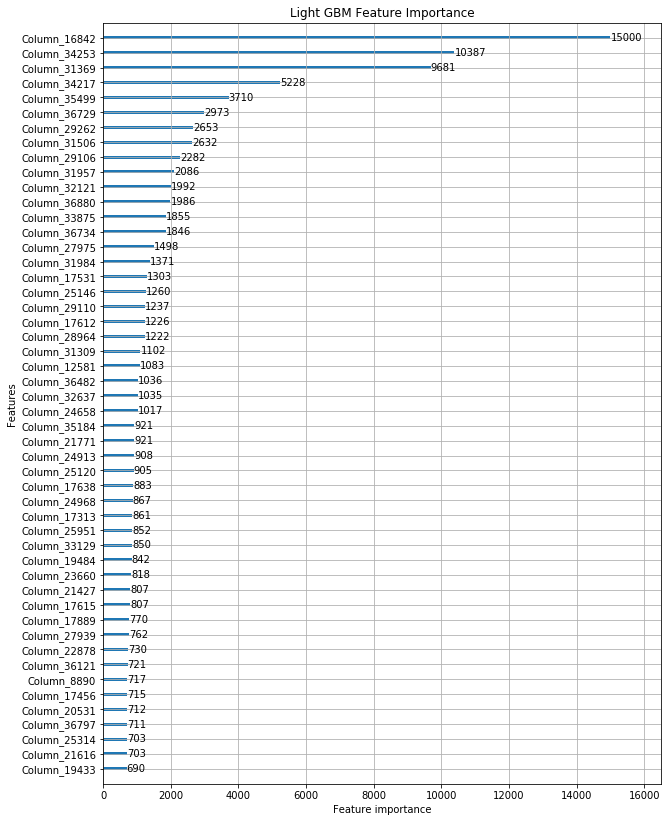

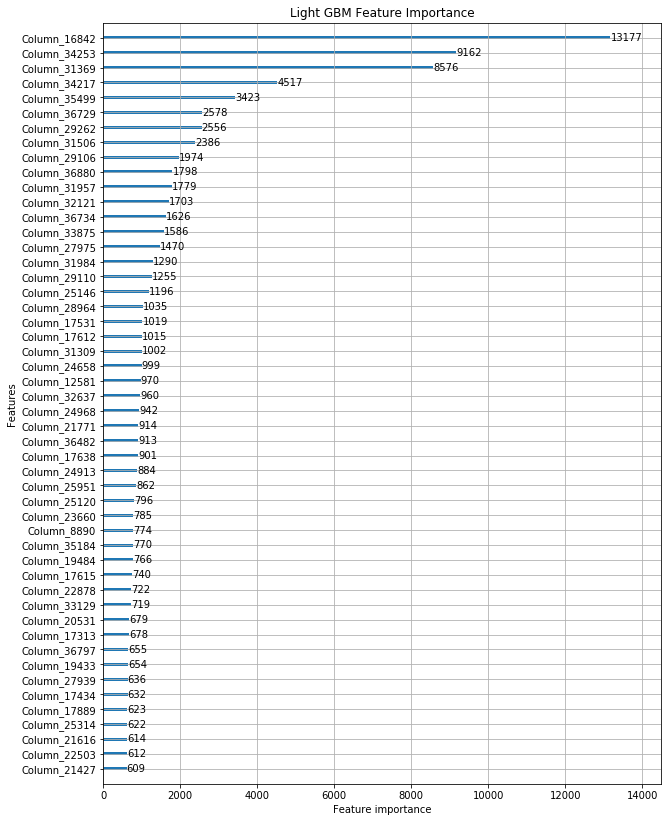

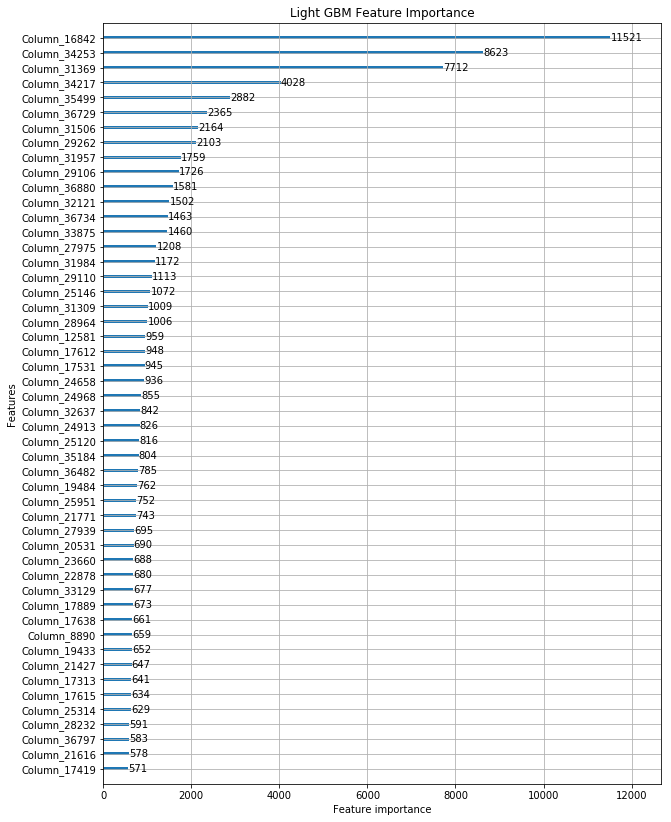

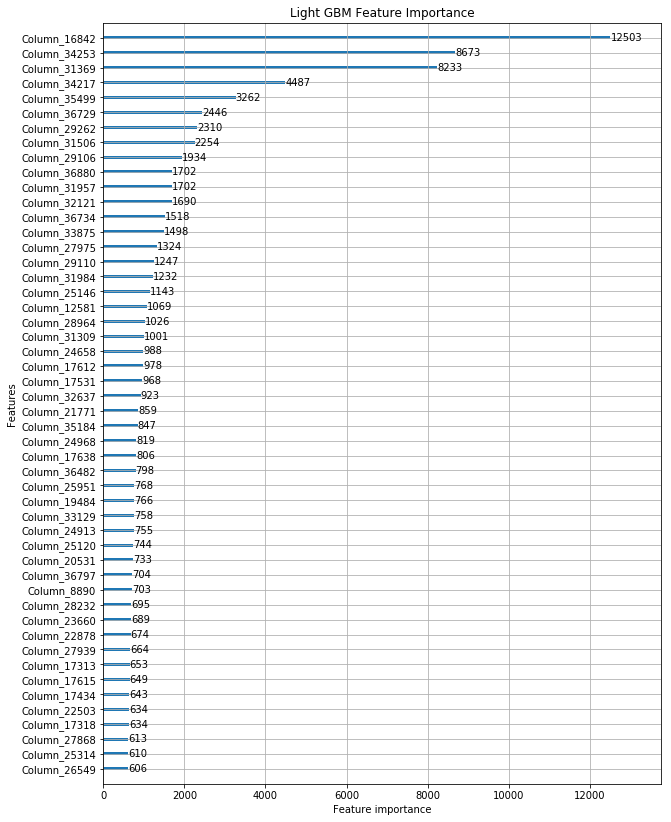

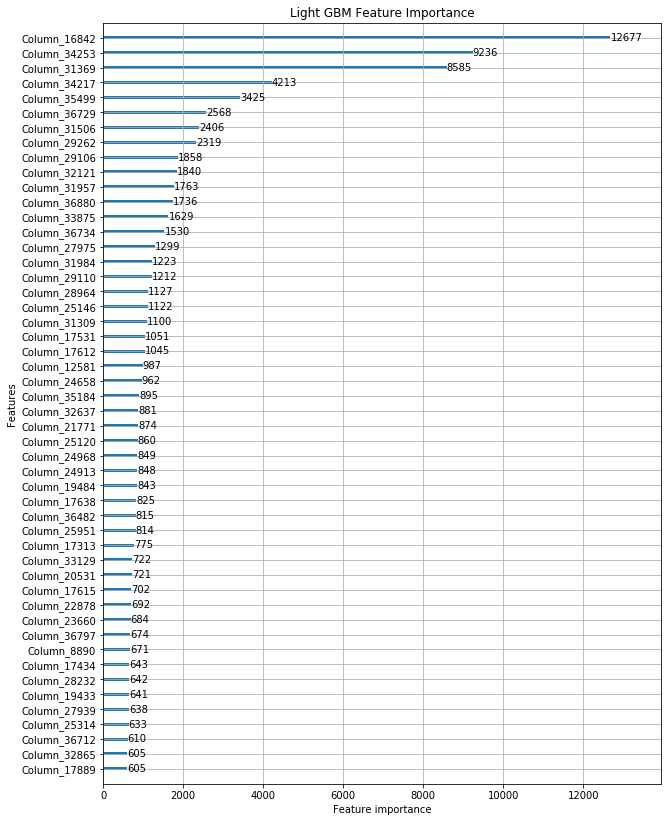

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
for model in models:
    fig, ax = plt.subplots(figsize=(10, 14))
    lgb.plot_importance(model, max_num_features=50, ax=ax)
    plt.title("Light GBM Feature Importance")
    plt.show()

In [10]:
import pickle
for i, m in enumerate(models):
    with open('text models/lgb_0522_{}.model'.format(i+1), 'wb') as handle:
        pickle.dump(m, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
test_df = pd.read_csv("data/test.csv", usecols=['item_id'])
test_pred = pd.read_csv("text_lgb_oof_test_pred.csv")
test_pred = test_pred.loc[:, 'text_lgb_pred'].values
pd.DataFrame(np.clip(test_pred,0,1), 
             index=test_df.item_id,
             columns=['deal_probability']).to_csv('text_lgb_submission.csv')

## FM_FTRL

In [6]:
ml = model_loader(model_type='fm')

In [7]:
default_params = {
    'alpha': .01,
    'beta': .005,
    'L1': 0.0001,
    'L2': 0.1,
    'D': train_X.shape[1],
    'D_fm': 30,
    'iters': 10,
    'seed': 719,
    'threads': 4,
    'verbose': 1
}

try_params = \
[
    {
        'alpha': [.01], 
        'beta': [.005]
    },
    {
        'alpha': [.005], 
        'beta': [.0025]
    },
    {
        'alpha': [.001], 
        'beta': [.0005]
    }
]

fit_params(train_X, train_y, ml, default_params, try_params, fit_params=None, seed=SEED)

Total e: 187339.7566860774
Total e: 183843.16638066983
Total e: 182978.27419218473
Total e: 182493.3090877491
Total e: 182167.49562861558
Total e: 181928.4330396345
Total e: 181742.31592095474
Total e: 181591.97881605753
Total e: 181466.81727185682
Total e: 181360.5507554193
{'alpha': 0.01, 'beta': 0.005} train loss: 0.223302, valid loss:0.228131, loss_diff:0.004829
Total e: 187506.50439032295
Total e: 183994.73402510898
Total e: 183118.60123618972
Total e: 182625.558651536
Total e: 182294.44899955156
Total e: 182050.7101302328
Total e: 181860.8851714999
Total e: 181707.10712815294
Total e: 181579.19354377198
Total e: 181470.6032589727
{'alpha': 0.01, 'beta': 0.005} train loss: 0.223366, valid loss:0.227765, loss_diff:0.004398
Total e: 187502.728292268
Total e: 184027.17116284068
Total e: 183165.22986396842
Total e: 182680.52330127568
Total e: 182355.15612551916
Total e: 182116.25945554665
Total e: 181930.24746591764
Total e: 181779.9107626945
Total e: 181655.0636472187
Total e: 181548

,param,val_loss_mean,val_loss_std
0,"{'alpha': 0.01, 'beta': 0.005}",0.227580,0.000433
1,"{'alpha': 0.005, 'beta': 0.0025}",0.227718,0.000455
2,"{'alpha': 0.001, 'beta': 0.0005}",0.228906,0.000483


In [8]:
default_params = {
    'alpha': .01,
    'beta': .005,
    'L1': 0.0001,
    'L2': 0.1,
    'D': train_X.shape[1],
    'D_fm': 30,
    'iters': 10,
    'seed': 719,
    'threads': 4,
    'verbose': 0
}

try_params = \
[
    {
        'L1': [0.01, 0.001, 0.0001], 
        'L2': [0.1, 0.01, 0.001]
    }
]

fit_params(train_X, train_y, ml, default_params, try_params, fit_params=None, seed=SEED)

{'L1': 0.01, 'L2': 0.1} train loss: 0.223291, valid loss:0.228115, loss_diff:0.004823
{'L1': 0.01, 'L2': 0.1} train loss: 0.223355, valid loss:0.227750, loss_diff:0.004395
{'L1': 0.01, 'L2': 0.1} train loss: 0.223448, valid loss:0.227458, loss_diff:0.004010
{'L1': 0.01, 'L2': 0.1} train loss: 0.223379, valid loss:0.227694, loss_diff:0.004314
{'L1': 0.01, 'L2': 0.1} train loss: 0.223614, valid loss:0.226811, loss_diff:0.003197
=================>{'L1': 0.01, 'L2': 0.1} loss:0.227565
{'L1': 0.01, 'L2': 0.01} train loss: 0.223291, valid loss:0.228117, loss_diff:0.004825
{'L1': 0.01, 'L2': 0.01} train loss: 0.223355, valid loss:0.227752, loss_diff:0.004397
{'L1': 0.01, 'L2': 0.01} train loss: 0.223448, valid loss:0.227460, loss_diff:0.004012
{'L1': 0.01, 'L2': 0.01} train loss: 0.223379, valid loss:0.227695, loss_diff:0.004316
{'L1': 0.01, 'L2': 0.01} train loss: 0.223614, valid loss:0.226813, loss_diff:0.003199
=================>{'L1': 0.01, 'L2': 0.01} loss:0.227567
{'L1': 0.01, 'L2': 0.0

,param,val_loss_mean,val_loss_std
0,"{'L1': 0.01, 'L2': 0.1}",0.227565,0.000432
1,"{'L1': 0.01, 'L2': 0.01}",0.227567,0.000432
2,"{'L1': 0.01, 'L2': 0.001}",0.227568,0.000432
3,"{'L1': 0.001, 'L2': 0.1}",0.227579,0.000433
4,"{'L1': 0.001, 'L2': 0.01}",0.227581,0.000433
5,"{'L1': 0.001, 'L2': 0.001}",0.227581,0.000433
6,"{'L1': 0.0001, 'L2': 0.1}",0.227580,0.000433
7,"{'L1': 0.0001, 'L2': 0.01}",0.227583,0.000433
8,"{'L1': 0.0001, 'L2': 0.001}",0.227583,0.000433


In [9]:
default_params = {
    'alpha': .01,
    'beta': .005,
    'L1': 0.01,
    'L2': 0.1,
    'D': train_X.shape[1],
    'D_fm': 30,
    'iters': 10,
    'seed': 719,
    'threads': 4,
    'verbose': 0
}

try_params = \
[
    {
        'D_fm': [30, 60, 90, 120]
    }
]

fit_params(train_X, train_y, ml, default_params, try_params, fit_params=None, seed=SEED)

{'D_fm': 30} train loss: 0.223291, valid loss:0.228115, loss_diff:0.004823
{'D_fm': 30} train loss: 0.223355, valid loss:0.227750, loss_diff:0.004395
{'D_fm': 30} train loss: 0.223448, valid loss:0.227458, loss_diff:0.004010
{'D_fm': 30} train loss: 0.223379, valid loss:0.227693, loss_diff:0.004314
{'D_fm': 30} train loss: 0.223614, valid loss:0.226811, loss_diff:0.003197
=================>{'D_fm': 30} loss:0.227565
{'D_fm': 60} train loss: 0.223235, valid loss:0.228098, loss_diff:0.004863
{'D_fm': 60} train loss: 0.223298, valid loss:0.227736, loss_diff:0.004438
{'D_fm': 60} train loss: 0.223393, valid loss:0.227440, loss_diff:0.004047
{'D_fm': 60} train loss: 0.223324, valid loss:0.227675, loss_diff:0.004351
{'D_fm': 60} train loss: 0.223558, valid loss:0.226793, loss_diff:0.003235
=================>{'D_fm': 60} loss:0.227548
{'D_fm': 90} train loss: 0.223177, valid loss:0.228080, loss_diff:0.004904
{'D_fm': 90} train loss: 0.223241, valid loss:0.227713, loss_diff:0.004471
{'D_fm': 9

,param,val_loss_mean,val_loss_std
0,{'D_fm': 30},0.227565,0.000432
1,{'D_fm': 60},0.227548,0.000433
2,{'D_fm': 90},0.227529,0.000432
3,{'D_fm': 120},0.227517,0.000432


In [10]:
default_params = {
    'alpha': .01,
    'beta': .005,
    'L1': 0.01,
    'L2': 0.1,
    'D': train_X.shape[1],
    'D_fm': 30,
    'iters': 10,
    'seed': 719,
    'threads': 4,
    'verbose': 0
}

try_params = \
[
    {
        'D_fm': [150, 200, 300]
    }
]

fit_params(train_X, train_y, ml, default_params, try_params, fit_params=None, seed=SEED)

{'D_fm': 150} train loss: 0.223068, valid loss:0.228048, loss_diff:0.004980
{'D_fm': 150} train loss: 0.223131, valid loss:0.227685, loss_diff:0.004554
{'D_fm': 150} train loss: 0.223225, valid loss:0.227394, loss_diff:0.004169
{'D_fm': 150} train loss: 0.223158, valid loss:0.227623, loss_diff:0.004465
{'D_fm': 150} train loss: 0.223392, valid loss:0.226742, loss_diff:0.003350
=================>{'D_fm': 150} loss:0.227498
{'D_fm': 200} train loss: 0.222976, valid loss:0.228019, loss_diff:0.005043
{'D_fm': 200} train loss: 0.223037, valid loss:0.227659, loss_diff:0.004622
{'D_fm': 200} train loss: 0.223133, valid loss:0.227361, loss_diff:0.004228
{'D_fm': 200} train loss: 0.223063, valid loss:0.227597, loss_diff:0.004534
{'D_fm': 200} train loss: 0.223299, valid loss:0.226710, loss_diff:0.003410
=================>{'D_fm': 200} loss:0.227469
{'D_fm': 300} train loss: 0.222800, valid loss:0.227967, loss_diff:0.005167
{'D_fm': 300} train loss: 0.222860, valid loss:0.227613, loss_diff:0.004

,param,val_loss_mean,val_loss_std
0,{'D_fm': 150},0.227498,0.000433
1,{'D_fm': 200},0.227469,0.000434
2,{'D_fm': 300},0.227421,0.000432


In [ ]:
default_params = {
    'alpha': .01,
    'beta': .005,
    'L1': 0.01,
    'L2': 0.1,
    'D': train_X.shape[1],
    'D_fm': 30,
    'iters': 10,
    'seed': 719,
    'threads': 4,
    'verbose': 0
}

try_params = \
[
    {
        'D_fm': [600, 900, 1200, 2400]
    }
]

fit_params(train_X, train_y, ml, default_params, try_params, fit_params=None, seed=SEED)

{'D_fm': 600} train loss: 0.222287, valid loss:0.227827, loss_diff:0.005540
{'D_fm': 600} train loss: 0.222345, valid loss:0.227483, loss_diff:0.005139
{'D_fm': 600} train loss: 0.222443, valid loss:0.227177, loss_diff:0.004734
{'D_fm': 600} train loss: 0.222376, valid loss:0.227408, loss_diff:0.005032
{'D_fm': 600} train loss: 0.222612, valid loss:0.226524, loss_diff:0.003912
=================>{'D_fm': 600} loss:0.227284
{'D_fm': 900} train loss: 0.221779, valid loss:0.227706, loss_diff:0.005927
{'D_fm': 900} train loss: 0.221841, valid loss:0.227345, loss_diff:0.005504
{'D_fm': 900} train loss: 0.221939, valid loss:0.227044, loss_diff:0.005106
{'D_fm': 900} train loss: 0.221870, valid loss:0.227282, loss_diff:0.005412
{'D_fm': 900} train loss: 0.222110, valid loss:0.226382, loss_diff:0.004271
=================>{'D_fm': 900} loss:0.227152
{'D_fm': 1200} train loss: 0.221308, valid loss:0.227600, loss_diff:0.006292
{'D_fm': 1200} train loss: 0.221367, valid loss:0.227246, loss_diff:0.0

In [7]:
default_params = {
    'alpha': .01,
    'beta': .005,
    'L1': 0.01,
    'L2': 0.1,
    'D': train_X.shape[1],
    'D_fm': 300,
    'iters': 10,
    'seed': 719,
    'threads': 4,
    'verbose': 0
}

try_params = \
[
    {
        'iters': [10, 20, 40]
    }
]

fit_params(train_X, train_y, ml, default_params, try_params, fit_params=None, seed=SEED)

{'iters': 10} train loss: 0.222800, valid loss:0.227967, loss_diff:0.005167
{'iters': 10} train loss: 0.222860, valid loss:0.227613, loss_diff:0.004753
{'iters': 10} train loss: 0.222956, valid loss:0.227314, loss_diff:0.004357
{'iters': 10} train loss: 0.222889, valid loss:0.227547, loss_diff:0.004658
{'iters': 10} train loss: 0.223123, valid loss:0.226666, loss_diff:0.003543
=================>{'iters': 10} loss:0.227421
{'iters': 20} train loss: 0.221957, valid loss:0.227933, loss_diff:0.005976
{'iters': 20} train loss: 0.222004, valid loss:0.227621, loss_diff:0.005617
{'iters': 20} train loss: 0.222109, valid loss:0.227289, loss_diff:0.005181
{'iters': 20} train loss: 0.222037, valid loss:0.227543, loss_diff:0.005506
{'iters': 20} train loss: 0.222273, valid loss:0.226665, loss_diff:0.004392
=================>{'iters': 20} loss:0.227410
{'iters': 40} train loss: 0.221124, valid loss:0.227954, loss_diff:0.006830
{'iters': 40} train loss: 0.221158, valid loss:0.227679, loss_diff:0.006

,param,val_loss_mean,val_loss_std
0,{'iters': 10},0.227421,0.000432
1,{'iters': 20},0.227410,0.000426
2,{'iters': 40},0.227451,0.000422


In [7]:
default_params = {
    'alpha': .01,
    'beta': .005,
    'L1': 0.01,
    'L2': 0.1,
    'D': train_X.shape[1],
    'D_fm': 1200,
    'iters': 20,
    'seed': 719,
    'threads': 4,
    'verbose': 0
}

fit_params = None

fm_oof_val_pred, fm_oof_test_pred, models = get_oof_predictions(train_X, train_y, test_X, ml, 
                                                                  default_params, seed=SEED, fit_params=fit_params, 
                                                                  use_eval_set=False)

Fold 1 completed.
Fold 2 completed.
Fold 3 completed.
Fold 4 completed.
Fold 5 completed.


In [8]:
pd.DataFrame(data=fm_oof_val_pred, columns=['text_fm_pred']).to_csv('text_fm_oof_val_pred.csv', index=False)
pd.DataFrame(data=fm_oof_test_pred, columns=['text_fm_pred']).to_csv('text_fm_oof_test_pred.csv', index=False)

## Ridge

In [9]:
ml = model_loader(model_type='rg')

In [7]:
default_params = {
    'alpha': 1.0, 
    'fit_intercept': True, 
    'normalize': False, 
    'copy_X': True, 
    'max_iter': None, 
    'tol': 0.001, 
    'solver':'auto', 
    'random_state': SEED
}

try_params = \
[
    {
        'alpha': [1., 2., 4., 8., 16.],
    }
]

fit_params(train_X, train_y, ml, default_params, try_params, fit_params=None, seed=SEED)

{'alpha': 1.0} train loss: 0.221366, valid loss:0.228450, loss_diff:0.007084
{'alpha': 1.0} train loss: 0.221394, valid loss:0.228262, loss_diff:0.006867
{'alpha': 1.0} train loss: 0.221504, valid loss:0.227885, loss_diff:0.006382
{'alpha': 1.0} train loss: 0.221417, valid loss:0.228219, loss_diff:0.006802
{'alpha': 1.0} train loss: 0.221664, valid loss:0.227269, loss_diff:0.005605
=================>{'alpha': 1.0} loss:0.228017
{'alpha': 2.0} train loss: 0.221585, valid loss:0.228197, loss_diff:0.006612
{'alpha': 2.0} train loss: 0.221614, valid loss:0.227981, loss_diff:0.006368
{'alpha': 2.0} train loss: 0.221723, valid loss:0.227616, loss_diff:0.005892
{'alpha': 2.0} train loss: 0.221639, valid loss:0.227938, loss_diff:0.006300
{'alpha': 2.0} train loss: 0.221885, valid loss:0.226993, loss_diff:0.005108
=================>{'alpha': 2.0} loss:0.227745
{'alpha': 4.0} train loss: 0.221962, valid loss:0.227921, loss_diff:0.005959
{'alpha': 4.0} train loss: 0.221997, valid loss:0.227668, l

,param,val_loss_mean,val_loss_std
0,{'alpha': 1.0},0.228017,0.000416
1,{'alpha': 2.0},0.227745,0.000419
2,{'alpha': 4.0},0.227444,0.000424
3,{'alpha': 8.0},0.227210,0.000431
4,{'alpha': 16.0},0.227172,0.000440


In [9]:
default_params = {
    'alpha': 1.0, 
    'fit_intercept': True, 
    'normalize': False, 
    'copy_X': True, 
    'max_iter': None, 
    'tol': 0.001, 
    'solver':'auto', 
    'random_state': SEED
}

try_params = \
[
    {
        'alpha': [14., 16., 18., 20.],
    }
]

fit_params(train_X, train_y, ml, default_params, try_params, fit_params=None, seed=SEED)

{'alpha': 14.0} train loss: 0.223276, valid loss:0.227700, loss_diff:0.004425
{'alpha': 14.0} train loss: 0.223327, valid loss:0.227346, loss_diff:0.004020
{'alpha': 14.0} train loss: 0.223426, valid loss:0.227046, loss_diff:0.003621
{'alpha': 14.0} train loss: 0.223350, valid loss:0.227312, loss_diff:0.003962
{'alpha': 14.0} train loss: 0.223594, valid loss:0.226387, loss_diff:0.002794
=================>{'alpha': 14.0} loss:0.227158
{'alpha': 16.0} train loss: 0.223470, valid loss:0.227721, loss_diff:0.004251
{'alpha': 16.0} train loss: 0.223524, valid loss:0.227354, loss_diff:0.003830
{'alpha': 16.0} train loss: 0.223621, valid loss:0.227061, loss_diff:0.003439
{'alpha': 16.0} train loss: 0.223548, valid loss:0.227324, loss_diff:0.003777
{'alpha': 16.0} train loss: 0.223790, valid loss:0.226399, loss_diff:0.002609
=================>{'alpha': 16.0} loss:0.227172
{'alpha': 18.0} train loss: 0.223651, valid loss:0.227749, loss_diff:0.004098
{'alpha': 18.0} train loss: 0.223706, valid lo

,param,val_loss_mean,val_loss_std
0,{'alpha': 14.0},0.227158,0.000438
1,{'alpha': 16.0},0.227172,0.000440
2,{'alpha': 18.0},0.227193,0.000442
3,{'alpha': 20.0},0.227219,0.000444


In [10]:
default_params = {
    'alpha': 14.0, 
    'fit_intercept': True, 
    'normalize': False, 
    'copy_X': True, 
    'max_iter': None, 
    'tol': 0.001, 
    'solver':'auto', 
    'random_state': SEED
}

fit_params = None

rg_oof_val_pred, rg_oof_test_pred, models = get_oof_predictions(train_X, train_y, test_X, ml, 
                                                                  default_params, seed=SEED, fit_params=fit_params, 
                                                                  use_eval_set=False)

Fold 1 completed.
Fold 2 completed.
Fold 3 completed.
Fold 4 completed.
Fold 5 completed.


In [11]:
pd.DataFrame(data=rg_oof_val_pred, columns=['text_rg_pred']).to_csv('text_rg_oof_val_pred.csv', index=False)
pd.DataFrame(data=rg_oof_test_pred, columns=['text_rg_pred']).to_csv('text_rg_oof_test_pred.csv', index=False)